# Posting to Twitter

## Using Twitter

Your Raspberry Pi can leverage Twitter as means of broadcasting status information (that is: your Raspberry Pi can tweet automatically!).

https://developer.twitter.com/en/docs/tweets/post-and-engage/overview

Here's the "Getting Started" documentation for Twitter API:
https://developer.twitter.com/en/docs/basics/getting-started

### Developer Account

Note: to use the Twitter API functionality, you need a "developer" account.  Create a new Twitter Handle to be associated with this project (this is the account that will be tweeting).

https://developer.twitter.com/en/apply-for-access.html

You will need to fill out an application so they know you are a human and know what your intentions are for the project.  Fill out all the questions, indicating that you are using this for a personal/school project and describing how it'll be used (e.g. your class project robot will be posting/tweeting status updates).

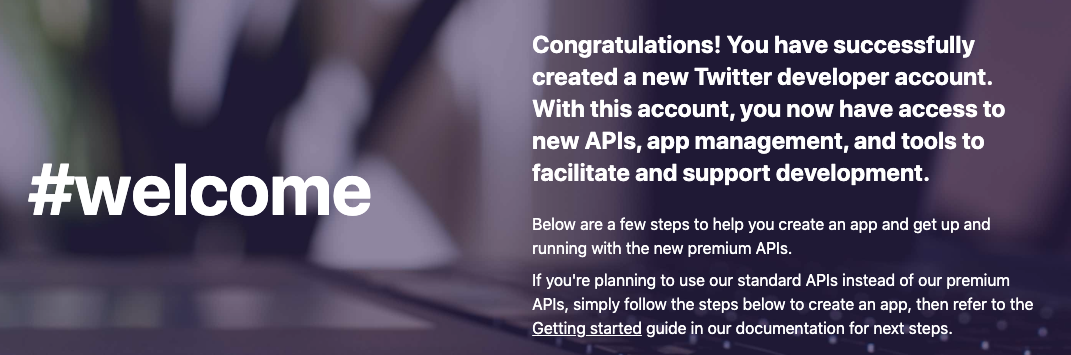

### Athentication

Once approved, to get the proper authentication for making Twitter calls, you need to "create an app" within the Twitter developer dashboard.

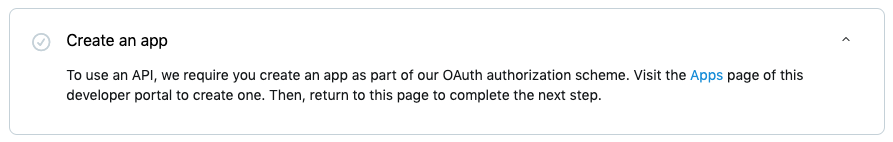

Note, since we are making an application that will automatically post to Twitter, you must be aware of, agree to, and not violate the "Automation rules" for developers: https://help.twitter.com/en/rules-and-policies/twitter-automation

Here is the link for creating new applications:

https://developer.twitter.com/en/apps

Once you create your application, it will generate an API Key and a API Secret Key for your app. Below that, also generate **Access token & access token secret**. We will then store all four of these in a local file in your Jupyter Notebook directory.

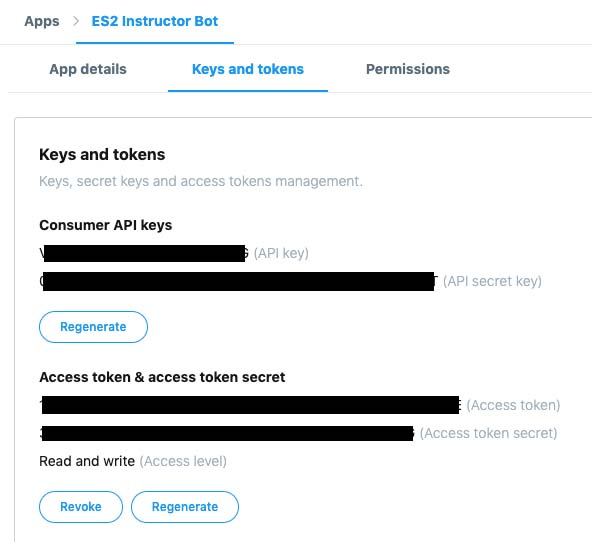

Store these four sequences as the first four lines in a local file (e.g. `TwitterKey.txt`) and use the following code to ensure that they are stored properly and you can access them.  We'll use a new function called `getTwitterKeys()` to access all this secret data within our code, and we'll use `OAuth1` (from `from requests_oauthlib import OAuth1`) for setting up the permissions.

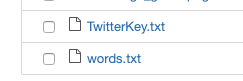

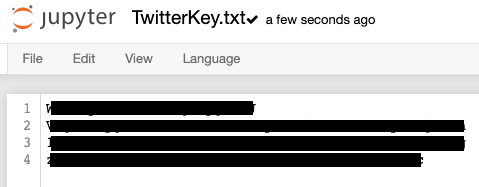

More on this here, if you are interested in security and permissions:

https://developer.twitter.com/en/docs/basics/authentication/overview

In [ ]:
# Import Twitter Keys from File
import requests
from requests_oauthlib import OAuth1
import json

# get the Twitter Key/Secret from a local file
def getTwitterKeys(filename):
    fin = open(filename)
    consumer_key = fin.readline().strip() # read line 1
    consumer_secret = fin.readline().strip() # read line 2
    access_token = fin.readline().strip() # read line 3
    access_secret = fin.readline().strip() # read line 4
    fin.close()
    return consumer_key, consumer_secret, access_token, access_secret

apikeyfile = 'TwitterKey.txt'
consumer_key, consumer_secret, access_token, access_secret = getTwitterKeys(apikeyfile)

print('C Key:', consumer_key) # check this matches what's in the file/from Twitter dashboard
print('C Secret:', consumer_secret) # check this matches what's in the file/from Twitter dashboard
print('A Token:', access_token) # check this matches what's in the file/from Twitter dashboard
print('A Secret:', access_secret) # check this matches what's in the file/from Twitter dashboard

### Test Twitter Connection

Now that we have our authentication we can start to use the Twitter API.

First, we will retrieve some twitter posts. Code adapted from the following two resources:

http://benalexkeen.com/interacting-with-the-twitter-api-using-python/

https://gist.github.com/ib-lundgren/4487236

And this Twitter API reference:

https://developer.twitter.com/en/docs/api-reference-index

Update the `query` term to something of your own interest, run code, and see if you get back Twitter posts (and a whole lot of other data!) as a reponse.  Go to twitter.com and check (run search, sort by 'latest') if the posts match what was most recently posted to twitter.

You can extract the `text` of the Twitter posts from the datastructure.

In [ ]:
# test Twitter connection: read tweets
import requests
from requests_oauthlib import OAuth1
import json

# get the Twitter Key/Secret from a local file
def getTwitterKeys(filename):
    fin = open(filename)
    consumer_key = fin.readline().strip() # read line 1
    consumer_secret = fin.readline().strip() # read line 2
    access_token = fin.readline().strip() # read line 3
    access_secret = fin.readline().strip() # read line 4
    fin.close()
    return consumer_key, consumer_secret, access_token, access_secret

apikeyfile = 'TwitterKey.txt'
consumer_key, consumer_secret, access_token, access_secret = getTwitterKeys(apikeyfile)
# set up authentication
twitter_auth = OAuth1(consumer_key, client_secret=consumer_secret,
                      resource_owner_key=access_token, resource_owner_secret=access_secret)

# our customization of search:
query = 'General Election' # customize to your topic
num_results = 2 # get two results

# set up the twitter call
base_url = 'https://api.twitter.com/'
# build search parameters
search_params = {'q': query, 'result_type': 'recent', 'count': num_results}
# set search url:
search_url = '{}1.1/search/tweets.json'.format(base_url)

# perform the search and get back the results
response = requests.get(search_url, params=search_params, auth=twitter_auth)

print("Response:", response) # check that <200> meaning it worked
print() # newline
print("Text:", response.text) # raw text returned
print() # newline
response_data = json.loads(response.text)
print("JSON:", response_data) # convert to JSON data structure

# extract the two 'text' fields from response_data (for the two results)
print()
print('1:',response_data['statuses'][0]['text'])
print('2:',response_data['statuses'][1]['text'])

### Time to Tweet!

Now let's create our account's first tweet (considered "updating your status" in Twitter API language).

Protocol information:

https://developer.twitter.com/en/docs/tweets/post-and-engage/api-reference/post-statuses-update

Tweet (`status` data) is posted to: https://api.twitter.com/1.1/statuses/update.json

If you get a `Response [200]` from this code, it probably worked!  Go check the Twitter Feed of that account.

In [ ]:
# how to tweet ("update your status")
import requests
from requests_oauthlib import OAuth1
import json

# get the Twitter Key/Secret from a local file
def getTwitterKeys(filename):
    fin = open(filename)
    consumer_key = fin.readline().strip() # read line 1
    consumer_secret = fin.readline().strip() # read line 2
    access_token = fin.readline().strip() # read line 3
    access_secret = fin.readline().strip() # read line 4
    fin.close()
    return consumer_key, consumer_secret, access_token, access_secret

apikeyfile = 'TwitterKey.txt'
consumer_key, consumer_secret, access_token, access_secret = getTwitterKeys(apikeyfile)
# set up authentication
twitter_auth = OAuth1(consumer_key, client_secret=consumer_secret,
                      resource_owner_key=access_token, resource_owner_secret=access_secret)

# set up the twitter call
base_url = 'https://api.twitter.com/'
# post_url:
post_url = '{}1.1/statuses/update.json'.format(base_url)

# post parameters (status is only required field)
message = 'My first automated post! Woo-hoo. Hello to all my fellow robots.'
post = {"status": message} # create data structure to post

response = requests.post(post_url, data=post, auth=twitter_auth)

print("Response:", response) # should be <200> meaning it worked
print() # new line
print("Text:", response.text) # reply back from Twitter about our post
print() # new line
print("JSON:", json.loads(response.text))

### Posting Media (Pictures) to Twitter

In addition to Tweeting text, sometimes you want to tweet an image too (image is considered "media" by Twitter).

Tweeting media is more difficult, as it requires a three-step process (upload the media, get back an `media_id`, and then associate that ID with your status update).

Description of this is within the Upload Media documentation:

https://developer.twitter.com/en/docs/media/upload-media/overview

These are two steps:

- Step 1: post the image to Twitter's server, and get back a Media ID
- Step 2: post your tweet (update status) and reference the Media ID

Then the image will be linked and displayed with your tweet.

Much of this code is the same as posting a status.  The differences are highlighted.

Info on uploading images:

https://developer.twitter.com/en/docs/media/upload-media/api-reference/post-media-upload.html

Info on updating statuses (tweeting), which includes incuding "media_ids" parameter:

https://developer.twitter.com/en/docs/tweets/post-and-engage/api-reference/post-statuses-update#post-statuses-update

In [ ]:
# posting media to Twitter
import requests
from requests_oauthlib import OAuth1
import json

# get the Twitter Key/Secret from a local file
def getTwitterKeys(filename):
    fin = open(filename)
    consumer_key = fin.readline().strip() # read line 1
    consumer_secret = fin.readline().strip() # read line 2
    access_token = fin.readline().strip() # read line 3
    access_secret = fin.readline().strip() # read line 4
    fin.close()
    return consumer_key, consumer_secret, access_token, access_secret

apikeyfile = 'TwitterKey.txt'
consumer_key, consumer_secret, access_token, access_secret = getTwitterKeys(apikeyfile)
# set up authentication
twitter_auth = OAuth1(consumer_key, client_secret=consumer_secret,
                      resource_owner_key=access_token, resource_owner_secret=access_secret)

# image to upload
image_path = "testimage.jpg" # this will load image from disk

# set up the twitter call: NOTE UPLOAD (not API)
media_base_url = 'https://upload.twitter.com/'
# media upload URL
media_post_url = '{}1.1/media/upload.json'.format(media_base_url)

#### STEP ONE: UPLOAD MEDIA TO TWITTER (and get back a media id)
#### Use 'https://upload.twitter.com/1.1/media/upload.json'

image_data = open(image_path, "rb").read() #read byte data of image
files = {'media': image_data}

# post to twitter (to the media_post_url)
response = requests.post(media_post_url, files=files, auth=twitter_auth)

print("Response:", response) # should be <200> meaning it worked
print() # new line
print("Text:", response.text) # reply back from Twitter about our post
print() # new line
print("JSON:", json.loads(response.text)) # should have the media_id
print() # new line

# GET THE MEDIA ID:
media_id = json.loads(response.text)['media_id']

print("Media ID:", media_id) # this number represents our image on Twitter server

#### STEP TWO: using media_id, now post a status (and link to that image)
#### THIS IS THE SAME AS YOU HAVE DONE BEFORE, just adding "media_ids" parameter

# set up the twitter call
base_url = 'https://api.twitter.com/'
# post_url (for updating status)
post_url = '{}1.1/statuses/update.json'.format(base_url)

# post parameters
message = 'My first picture post!'
post = {"status": message, "media_ids": media_id} # media_id from above!

response = requests.post(post_url, data=post, auth=twitter_auth)

print("Response:", response) # should be <200> meaning it worked
print() # new line
print("Text:", response.text) # reply back from Twitter about our post
print() # new line
print("JSON:", json.loads(response.text))